Road accidents Belgium 2005-2018 

D:\Github\Road_accidents_Belgium

Source:

Data available at https://statbel.fgov.be/en/open-data. This data is made available under the 'Licentie open data' which is compatible with the Creative Commons Attribution 2.0 license https://creativecommons.org/licenses/by/2.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os, re, sys

In [2]:
# 'geopandas' in sys.modules

In [3]:
# conda list

In [4]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [5]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Accidents')

In [6]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Accidents'

In [7]:
path = os.getcwd()
files = os.listdir(path)

In [8]:
files_xls = [f for f in files if f[-4:] == 'xlsx']

In [9]:
files_xls

['TF_ACCIDENTS_2005.xlsx',
 'TF_ACCIDENTS_2006.xlsx',
 'TF_ACCIDENTS_2007.xlsx',
 'TF_ACCIDENTS_2008.xlsx',
 'TF_ACCIDENTS_2009.xlsx',
 'TF_ACCIDENTS_2010.xlsx',
 'TF_ACCIDENTS_2011.xlsx',
 'TF_ACCIDENTS_2012.xlsx',
 'TF_ACCIDENTS_2013.xlsx',
 'TF_ACCIDENTS_2014.xlsx',
 'TF_ACCIDENTS_2015.xlsx',
 'TF_ACCIDENTS_2016.xlsx',
 'TF_ACCIDENTS_2017.xlsx',
 'TF_ACCIDENTS_2018.xlsx']

In [10]:
df_accidents = pd.DataFrame()

In [11]:
#Make one dataframe out of all the .xlsx files
#Loop over list of files to append to empty dataframe:
for f in files_xls:
    data = pd.read_excel(f)
    df_accidents = df_accidents.append(data)

In [12]:
df_accidents.columns

Index(['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_FR',
       'TX_DAY_OF_WEEK_DESCR_NL', 'CD_BUILD_UP_AREA',
       'TX_BUILD_UP_AREA_DESCR_NL', 'TX_BUILD_UP_AREA_DESCR_FR',
       'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_NL', 'TX_COLL_TYPE_DESCR_FR',
       'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL', 'TX_LIGHT_COND_DESCR_FR',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'TX_ROAD_TYPE_DESCR_FR',
       'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_NL', 'TX_MUNTY_DESCR_FR',
       'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL', 'TX_ADM_DSTR_DESCR_FR',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'TX_PROV_DESCR_FR',
       'CD_RGN_REFNIS', 'TX_RGN_DESCR_NL', 'TX_RGN_DESCR_FR', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')

In [13]:
#remove french descriptions (FR columns)
cols = [c for c in df_accidents.columns if not c.endswith('FR')]
cols
df_accidents=df_accidents[cols]

In [14]:
df_accidents.columns

Index(['DT_DAY', 'DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ'],
      dtype='object')

In [15]:
df_accidents.shape

(617972, 26)

In [16]:
df_accidents.head(2)

,DT_DAY,DT_HOUR,CD_DAY_OF_WEEK,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,...,CD_PROV_REFNIS,TX_PROV_DESCR_NL,CD_RGN_REFNIS,TX_RGN_DESCR_NL,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ
0,2005-01-04,10,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,1,0,0,0,0,1
1,2005-01-05,16,3,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,...,10000.0,Provincie Antwerpen,2000,Vlaams Gewest,1,0,0,0,0,1


In [17]:
#convert to pd datetime and create 'date' column
df_accidents['date'] = pd.to_datetime(df_accidents['DT_DAY'])
df_accidents = df_accidents.drop('DT_DAY',axis=1)

In [18]:
#add month column
df_accidents['month'] = df_accidents['date'].apply(lambda date: date.month)

In [19]:
#add year column
df_accidents['year'] = df_accidents['date'].apply(lambda date: date.year)

In [20]:
#add quarter 
df_accidents['quarter'] = df_accidents['date'].apply(lambda date: date.quarter)

In [21]:
df_accidents.columns

Index(['DT_HOUR', 'CD_DAY_OF_WEEK', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ', 'date', 'month',
       'year', 'quarter'],
      dtype='object')

In [22]:
#change column names 'DT_HOUR', 'CD_DAY_OF_WEEK' to 'hour', 'dow'
df_accidents.columns = ['hour', 'dow', 'TX_DAY_OF_WEEK_DESCR_NL',
       'CD_BUILD_UP_AREA', 'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE',
       'TX_COLL_TYPE_DESCR_NL', 'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL',
       'CD_ROAD_TYPE', 'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS',
       'TX_MUNTY_DESCR_NL', 'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL',
       'CD_PROV_REFNIS', 'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS',
       'TX_RGN_DESCR_NL', 'MS_ACCT', 'MS_ACCT_WITH_DEAD',
       'MS_ACCT_WITH_DEAD_30_DAYS', 'MS_ACCT_WITH_MORY_INJ',
       'MS_ACCT_WITH_SERLY_INJ', 'MS_ACCT_WITH_SLY_INJ', 'date', 'month',
       'year', 'quarter']

In [23]:
df_accidents.columns

Index(['hour', 'dow', 'TX_DAY_OF_WEEK_DESCR_NL', 'CD_BUILD_UP_AREA',
       'TX_BUILD_UP_AREA_DESCR_NL', 'CD_COLL_TYPE', 'TX_COLL_TYPE_DESCR_NL',
       'CD_LIGHT_COND', 'TX_LIGHT_COND_DESCR_NL', 'CD_ROAD_TYPE',
       'TX_ROAD_TYPE_DESCR_NL', 'CD_MUNTY_REFNIS', 'TX_MUNTY_DESCR_NL',
       'CD_DSTR_REFNIS', 'TX_ADM_DSTR_DESCR_NL', 'CD_PROV_REFNIS',
       'TX_PROV_DESCR_NL', 'CD_RGN_REFNIS', 'TX_RGN_DESCR_NL', 'MS_ACCT',
       'MS_ACCT_WITH_DEAD', 'MS_ACCT_WITH_DEAD_30_DAYS',
       'MS_ACCT_WITH_MORY_INJ', 'MS_ACCT_WITH_SERLY_INJ',
       'MS_ACCT_WITH_SLY_INJ', 'date', 'month', 'year', 'quarter'],
      dtype='object')

In [24]:
#double info? 
#(data available in both text form and numerical form)
df_accidents.head()

,hour,dow,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,...,MS_ACCT,MS_ACCT_WITH_DEAD,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,date,month,year,quarter
0,10,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,1,0,0,0,0,1,2005-01-04,1,2005,1
1,16,3,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,1,0,0,0,0,1,2005-01-05,1,2005,1
2,16,2,dinsdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,...,1,0,0,0,0,1,2005-01-11,1,2005,1
3,24,2,dinsdag,1.0,Binnen bebouwde kom,7.0,Tegen een hindernis buiten de rijbaan,3.0,"Nacht, ontstoken openbare verlichting",2.0,...,1,0,0,0,0,1,2005-01-04,1,2005,1
4,19,2,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,3.0,"Nacht, ontstoken openbare verlichting",2.0,...,1,0,0,0,0,1,2005-01-11,1,2005,1


In [25]:
df_accidents['dayow'] = df_accidents['dow']
df_accidents = df_accidents.drop('dow',axis=1)

In [26]:
df_accidents['hr'] = df_accidents['hour']
df_accidents = df_accidents.drop('hour',axis=1)

In [27]:
df_accidents.head()

,TX_DAY_OF_WEEK_DESCR_NL,CD_BUILD_UP_AREA,TX_BUILD_UP_AREA_DESCR_NL,CD_COLL_TYPE,TX_COLL_TYPE_DESCR_NL,CD_LIGHT_COND,TX_LIGHT_COND_DESCR_NL,CD_ROAD_TYPE,TX_ROAD_TYPE_DESCR_NL,CD_MUNTY_REFNIS,...,MS_ACCT_WITH_DEAD_30_DAYS,MS_ACCT_WITH_MORY_INJ,MS_ACCT_WITH_SERLY_INJ,MS_ACCT_WITH_SLY_INJ,date,month,year,quarter,dayow,hr
0,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-04,1,2005,1,2,10
1,woensdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-05,1,2005,1,3,16
2,dinsdag,1.0,Binnen bebouwde kom,4.0,Langs opzij,1.0,Bij klaarlichte dag,2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-11,1,2005,1,2,16
3,dinsdag,1.0,Binnen bebouwde kom,7.0,Tegen een hindernis buiten de rijbaan,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-04,1,2005,1,2,24
4,dinsdag,2.0,Buiten bebouwde kom,4.0,Langs opzij,3.0,"Nacht, ontstoken openbare verlichting",2.0,"Gewestweg, provincieweg of gemeenteweg",11001,...,0,0,0,1,2005-01-11,1,2005,1,2,19


In [28]:
df_accidents = df_accidents.drop('date',axis=1)

In [29]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Accidents'

In [30]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\')

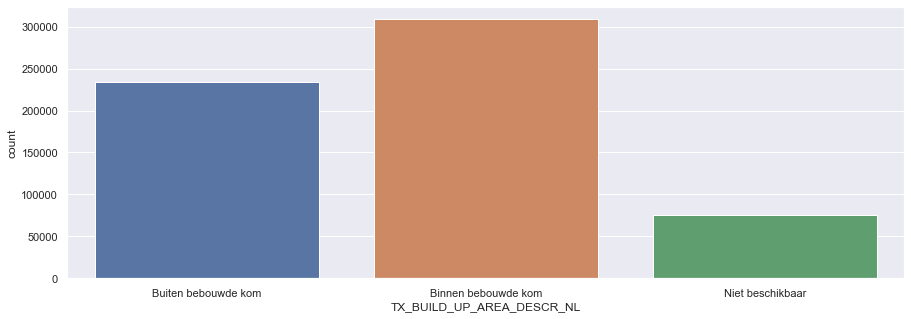

In [34]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_BUILD_UP_AREA_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
fig = ax.get_figure()
fig.savefig('area.png', dpi=300)

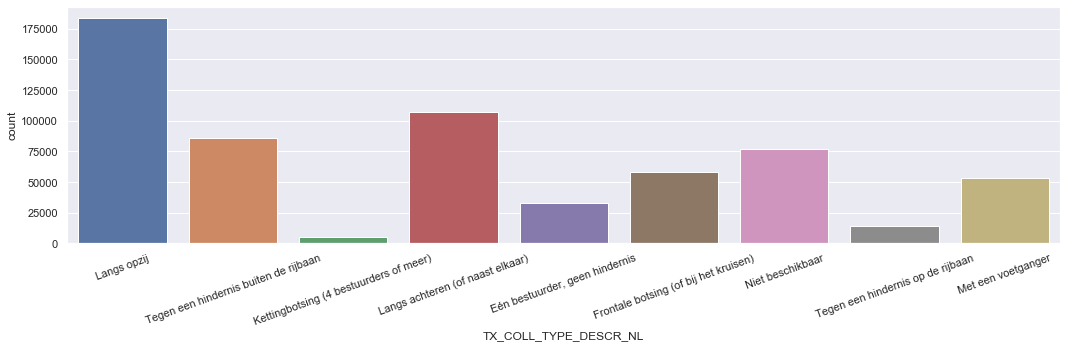

In [35]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_COLL_TYPE_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('collision_type.png', dpi=300)

In [59]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium\\Plots'

AttributeError: 'JointGrid' object has no attribute 'get_figure'

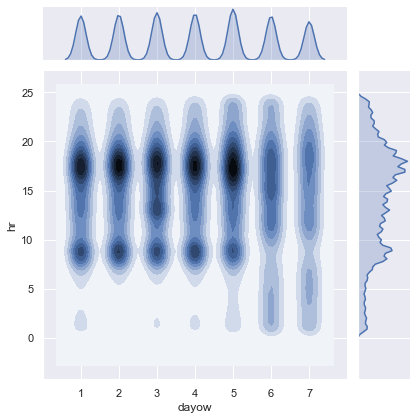

In [60]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.jointplot(x='dayow', y='hr',data=df_accidents,kind="kde")


In [61]:
ax.savefig('joint_plot_dayow_hr.png', dpi=300)

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_LIGHT_COND_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('light_condition.png', dpi=300)

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(df_accidents['TX_ROAD_TYPE_DESCR_NL'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('road_type.png', dpi=300)

In [ ]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Accidents')

In [ ]:
os.getcwd()

In [ ]:
# TX_DAY_OF_WEEK_DESCR_NL = dow(numerical)
df_accidents = df_accidents.drop('TX_DAY_OF_WEEK_DESCR_NL',axis=1)

In [ ]:
df_accidents['TX_BUILD_UP_AREA_DESCR_NL'].value_counts()

In [ ]:
df_accidents['CD_BUILD_UP_AREA'].value_counts()

In [ ]:
#where did "not available" (Niet beschikbaar) go?

In [ ]:
df_accidents['CD_BUILD_UP_AREA'].isnull().sum()

In [ ]:
#replace nan's with 3.0
df_accidents["CD_BUILD_UP_AREA"].fillna(3.0, inplace = True) 

In [ ]:
df_accidents['CD_BUILD_UP_AREA'].value_counts()

#1.0 = Binnen bebouwde kom (in residential area)
#2.0 = Buiten bebouwde kom (outside built-up areas)
#3.0 = Niet beschikbaar (not available)


In [ ]:
#remove text column 
df_accidents = df_accidents.drop('TX_BUILD_UP_AREA_DESCR_NL',axis=1)

In [ ]:
df_accidents.head(4)

In [ ]:
df_accidents['CD_COLL_TYPE'].value_counts()

In [ ]:
df_accidents['TX_COLL_TYPE_DESCR_NL'].value_counts()

In [ ]:
# 1.0 = Kettingbotsing (4 bestuurders of meer)      5637
# 2.0 = Frontale botsing (of bij het kruisen)      58302
# 3.0 = Langs achteren (of naast elkaar)          107443
# 4.0 = Langs opzij                               183703
# 5.0 = Met een voetganger                         53409
# 6.0 = Tegen een hindernis op de rijbaan          14049
# 7.0 = Tegen een hindernis buiten de rijbaan      85647

In [ ]:
#remove text column 
df_accidents = df_accidents.drop('TX_COLL_TYPE_DESCR_NL',axis=1)

In [ ]:
df_accidents.head(4)

In [ ]:
df_accidents['TX_LIGHT_COND_DESCR_NL'].value_counts()

In [ ]:
df_accidents['CD_LIGHT_COND'].value_counts()

In [ ]:
#5.0 is missing "not available" (Niet beschikbaar) 

In [ ]:
#replace nan's with 5.0
df_accidents['CD_LIGHT_COND'].fillna(5.0, inplace = True) 

In [ ]:
df_accidents['CD_LIGHT_COND'].value_counts()

In [ ]:
# Bij klaarlichte dag                      398885
# Nacht, ontstoken openbare verlichting    126694
# Niet beschikbaar                          48992
# Dageraad - schemering                     27415
# Nacht, geen openbare verlichting          15986

# 1.0    398885
# 3.0    126694
# 5.0     48992
# 2.0     27415
# 4.0     15986

In [ ]:
#remove text column 
df_accidents = df_accidents.drop('TX_LIGHT_COND_DESCR_NL',axis=1)

In [ ]:
df_accidents.head(2)

In [ ]:
df_accidents['TX_ROAD_TYPE_DESCR_NL'].value_counts()

In [ ]:
df_accidents['CD_ROAD_TYPE'].value_counts()

In [ ]:
#3.0 is missing "unknown" (Onbekend) 

In [ ]:
#replace nan's with 3.0
df_accidents['CD_ROAD_TYPE'].fillna(3.0, inplace = True) 

In [ ]:
df_accidents['CD_ROAD_TYPE'].value_counts()

In [ ]:
# Gewestweg, provincieweg of gemeenteweg    562714
# Autosnelweg                                49269
# Onbekend                                    5989

# 2.0    562714
# 1.0     49269
# 3.0      5989

In [ ]:
#remove text column 
df_accidents = df_accidents.drop('TX_ROAD_TYPE_DESCR_NL',axis=1)

In [ ]:
df_accidents.head(2)

In [ ]:
df_accidents['CD_MUNTY_REFNIS'].value_counts()

In [ ]:
df_accidents['TX_MUNTY_DESCR_NL'].value_counts()

In [ ]:
df_accidents[df_accidents['TX_MUNTY_DESCR_NL']=='Overpelt']

Explore REFNIS

https://en.wikipedia.org/wiki/Provinces_of_Belgium
The country of Belgium is divided into three regions. Two of these regions, the Flemish Region or Flanders, and Walloon Region, or Wallonia, are each subdivided into five provinces. The third region, the Brussels-Capital Region, is not divided into provinces, as it was originally only a small part of a province itself. 

https://nl.wikipedia.org/wiki/NIS-code
De NIS-code (Frans: code INS) is een alfanumerieke code voor geografische gebieden die toegepast wordt voor statistische verwerkingen in België. Deze code werd in het midden van de jaren 60 ontwikkeld door het Nationaal Instituut voor de Statistiek (NIS) (nu Statbel).


https://statbel.fgov.be/nl/open-data/refnis-code
België is ingedeeld volgens een hiërarchisch systeem dat de Fransen in 1796 ingevoerd hebben. De administratieve indeling gebeurt aan de hand van vier territoriale eenheden: gewesten, provincies, bestuurlijke arrondissementen en gemeenten. De gemeenten zijn de basis-eenheden, dit wil zeggen dat elke territoriale eenheid op een hoger niveau uit verschillende gemeenten bestaat.
Structuur

    Level 1: 3 gewesten
    Level 2: 10 provincies
    Level 3: 43 bestuurlijke arrondissementen
    Level 4: 581 gemeenten (589 tot 31/12/2018) --- sanity check: length of CD_MUNTY_REFNIS also 589
    Level 5: Deelgemeenten
    Level 7: Statistische sectoren

https://nl.wikipedia.org/wiki/Arrondissement
Een arrondissement is een onderdeel van het grondgebied van de staat, dat wordt opgedeeld om administratieve of bestuurlijke redenen. Elk arrondissement is een ambtsgebied van colleges en ambtenaren (werkzaam voor een overheid). Het komt oorspronkelijk uit het Frans en betekent letterlijk afronding. 

https://nl.wikipedia.org/wiki/Deelgemeente_(Belgi%C3%AB)
Een deelgemeente is in België het grondgebied van de voormalige gemeenten die vóór de grote gemeentelijke herindelingen in de jaren 1960-'70 nog zelfstandig waren

In [ ]:
#Found REFNIS file on https://statbel.fgov.be/nl/over-statbel/methodologie/classificaties/geografie

In [ ]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Geoplot')

In [ ]:
os.getcwd()

In [ ]:
df_refnis = pd.read_excel('refnis.xlsx')

In [ ]:
#df_refnis

In [ ]:
#remove french columns
df_refnis = df_refnis.drop(['Code INS','Entités administratives','Langue'], axis=1)

In [ ]:
df_refnis

how to plot a map?

Geopandas:
https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

Sources:

1) http://www.geopunt.be/download?container=referentiebestand-gemeenten&title=Voorlopig%20referentiebestand%20gemeentegrenzen# (shapefiles of only Flanders)


2) https://www.geo.be/#!/catalog/details/9738c7c0-5255-11ea-8895-34e12d0f0423?l=nl (postal codes of Belgium)


3) https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/belgium-shapefile

4) https://hub.arcgis.com/datasets/esribeluxdata::belgium-municipalities




In [ ]:
import geopandas as gpd

In [ ]:
#Explore source 1)

# set the filepath and load in a shapefile
#gewesten
gew = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refgew.shp"
#provincies
prv = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refprv.shp"
#gemeentes
gem = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refgem.shp"
#rarrondisementen
arr = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Shapefiles\\GewVLA_Shape\\Shapefile\\Refarr.shp"

In [ ]:
map_gew = gpd.read_file(gew)
map_prv = gpd.read_file(prv)
map_gem = gpd.read_file(gem)
map_arr = gpd.read_file(arr)

In [ ]:
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# had to install descartes in anaconda environment to make this work

map_gew.head() 

In [ ]:
map_prv.head(5) 

In [ ]:
map_gem.head(4) 

In [ ]:
map_arr.head() 

In [ ]:
len(map_gew['NISCODE'])

In [ ]:
len(map_prv['NISCODE'])

In [ ]:
len(map_gem['NISCODE']) #300 municipalities in Flanders

In [ ]:
len(map_arr['NISCODE'])

In [ ]:
# Create four polar axes and access them through the returned array
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,22))
ax1 = map_gew.plot(linewidth=0.8, ax=ax1, edgecolor='0.8')
ax2 = map_prv.plot(linewidth=0.8, ax=ax2, edgecolor='0.8')
ax3 = map_gem.plot(linewidth=0.8, ax=ax3, edgecolor='0.8')
ax4 = map_arr.plot(linewidth=0.8, ax=ax4, edgecolor='0.8')

In [ ]:
#Explore source 2)

# set the filepath and load in a shapefile

postal_code = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Geodotbe\\3812\\postaldistricts.shp"


In [ ]:
map_postal_code = gpd.read_file(postal_code)

In [ ]:
map_postal_code.head()

In [ ]:
map_postal_code['nouveau_PO'].value_counts()

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 15))
map_postal_code.plot(ax=ax)

In [ ]:
#Explore source 3)

eea = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Eea\\be_10km.shp"

In [ ]:
map_eea = gpd.read_file(eea)

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 15))
map_eea.plot(ax=ax)

In [ ]:
#Explore source 4)

arcgis_mun = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\municipalities\\bemun.shp"
arcgis_prov = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\provinces\\provinces.shp"


In [ ]:
map_arcgis_mun = gpd.read_file(arcgis_mun)
map_arcgis_prov = gpd.read_file(arcgis_prov)

In [ ]:
map_arcgis_mun.head()

In [ ]:
map_arcgis_prov.head()

In [ ]:
len(map_arcgis_mun['CODE_INS'])

In [ ]:
len(map_arcgis_prov['NE_Name'])

Nice! Arcgis got the geometry of all 589 municipalities in Belgium.
So 4) it is.

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,15))
map_arcgis_mun.plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,15))
map_arcgis_prov.plot(ax=ax)

In [ ]:
df_accidents.head()

Now that we have the geoplot data for the REFNIS, let's remove the alpha representation

In [ ]:
df_accidents = df_accidents.drop('TX_MUNTY_DESCR_NL',axis=1)

In [ ]:
df_accidents.head()

In [ ]:
df_accidents['CD_DSTR_REFNIS'].value_counts()

In [ ]:
df_accidents['TX_ADM_DSTR_DESCR_NL'].value_counts()

In [ ]:
# 11000    64214
# 21000    53545
# 44000    41015
# 62000    31891
# 23000    28897
# 71000    27516
# 13000    25591
# 31000    23720
# 24000    23497
# 52000    21062
# 46000    17965
# 34000    17964
# 12000    17604
# 25000    17319
# 41000    16649
# 92000    15248
# 63000    13843
# 42000    12744
# 72000    12615
# 35000     9934
# 73000     9858
# 53000     9749
# 36000     8707
# 55000     8044
# 57000     7511
# 56000     6988
# 45000     6880
# 43000     6501
# 33000     6172
# 91000     6076
# 61000     5659
# 37000     4617
# 38000     4519
# 51000     4082
# 93000     4079
# 83000     3883
# 84000     3819
# 64000     3566
# 54000     3444
# 81000     2869
# 32000     2854
# 82000     2840
# 85000     2422

# Arrondissement Antwerpen            64214
# Arrondissement Brussel-Hoofdstad    53545
# Arrondissement Gent                 41015
# Arrondissement Luik                 31891
# Arrondissement Halle-Vilvoorde      28897
# Arrondissement Hasselt              27516
# Arrondissement Turnhout             25591
# Arrondissement Brugge               23720
# Arrondissement Leuven               23497
# Arrondissement Charleroi            21062
# Arrondissement Sint-Niklaas         17965
# Arrondissement Kortrijk             17964
# Arrondissement Mechelen             17604
# Arrondissement Nijvel               17319
# Arrondissement Aalst                16649
# Arrondissement Namen                15248
# Arrondissement Verviers             13843
# Arrondissement Dendermonde          12744
# Arrondissement Maaseik              12615
# Arrondissement Oostende              9934
# Arrondissement Tongeren              9858
# Arrondissement Bergen                9749
# Arrondissement Roeselare             8707
# Arrondissement Zinnik                8044
# Arrondissement Doornik               7511
# Arrondissement Thuin                 6988
# Arrondissement Oudenaarde            6880
# Arrondissement Eeklo                 6501
# Arrondissement Ieper                 6172
# Arrondissement Dinant                6076
# Arrondissement Hoei                  5659
# Arrondissement Tielt                 4617
# Arrondissement Veurne                4519
# Arrondissement Aat                   4082
# Arrondissement Philippeville         4079
# Arrondissement Marche-en-Famenne     3883
# Arrondissement Neufchâteau           3819
# Arrondissement Borgworm              3566
# Arrondissement Moeskroen             3444
# Arrondissement Aarlen                2869
# Arrondissement Diksmuide             2854
# Arrondissement Bastenaken            2840
# Arrondissement Virton                2422

In [ ]:
df_accidents = df_accidents.drop('TX_ADM_DSTR_DESCR_NL',axis=1)

In [ ]:
df_accidents.head()

In [ ]:
df_accidents = df_accidents.drop('TX_PROV_DESCR_NL',axis=1)

In [ ]:
df_accidents.head()

In [ ]:
df_accidents['CD_DSTR_REFNIS'].value_counts()

In [ ]:
df_accidents['TX_RGN_DESCR_NL'].value_counts()

In [ ]:
# 2000    390033
# 3000    174394
# 4000     53545
# Vlaams Gewest                     390033
# Waals Gewest                      174394
# Brussels Hoofdstedelijk Gewest     53545

In [ ]:
df_accidents = df_accidents.drop('TX_RGN_DESCR_NL',axis=1)

In [ ]:
df_accidents.head()

In [ ]:
df_accidents['MS_ACCT'].value_counts()

In [ ]:
#rename the column names

#CD_BUILD_UP_AREA = where

#1.0 = Binnen bebouwde kom (in residential area)
#2.0 = Buiten bebouwde kom (outside built-up areas)
#3.0 = Niet beschikbaar (not available)

#CD_COLL_TYPE = how

#CD_ROAD_TYPE = roadtype

# Gewestweg, provincieweg of gemeenteweg    562714
# Autosnelweg                                49269
# Onbekend                                    5989

df_accidents = df_accidents.rename(index=str, columns={'CD_BUILD_UP_AREA':'where',
                                                      'CD_COLL_TYPE':'how',
                                                      'CD_ROAD_TYPE':'typeofroad',
                                                      'CD_MUNTY_REFNIS':'refnismun',
                                                      'CD_DSTR_REFNIS':'refnisdist',
                                                      'CD_PROV_REFNIS':'refnisprov',
                                                      'CD_RGN_REFNIS':'refnisgew',
                                                      'CD_LIGHT_COND':'illumination',
                                                      'MS_ACCT_WITH_DEAD':'dead',
                                                      'MS_ACCT_WITH_DEAD_30_DAYS':'deadafter30d',
                                                      'MS_ACCT_WITH_MORY_INJ':'mortallyinjured',
                                                      'MS_ACCT_WITH_SERLY_INJ':'severelyinjured',
                                                      'MS_ACCT_WITH_SLY_INJ':'slightlyinjured',})

In [ ]:
df_accidents.head()

In [ ]:
df_accidents = df_accidents.drop('MS_ACCT',axis=1)

In [ ]:
df_accidents.head()

EDA: Exploratory data analysis

In [ ]:
%%time
#sns.pairplot(df_accidents)

In [ ]:
df_accidents.columns

In [ ]:
df_reduced = df_accidents[['refnismun','dead']]

In [ ]:
df_reduced = df_reduced.groupby(['refnismun']).sum()

In [ ]:
df_reduced.head(10)

In [ ]:
df_reduced.reset_index(level=0, inplace=True)

In [ ]:
df_reduced.head(10)

In [ ]:
df_reduced.nunique()

In [ ]:
map_arcgis_mun.head()

In [ ]:
map_arcgis_mun = map_arcgis_mun.drop(['OBJECTID','ADMUNAFR','ADMUNADU','ADMUNAGE','Communes','arrond'],axis=1)

In [ ]:
map_arcgis_mun.head(5)

In [ ]:
type(map_arcgis_mun['CODE_INS'].iloc[0])

In [ ]:
map_arcgis_mun['CODE_INS']=map_arcgis_mun['CODE_INS'].astype(int)

In [ ]:
map_arcgis_mun.nunique()

In [ ]:
df_reduced.head(5)

In [ ]:
df_reduced = df_reduced.rename(columns={'refnismun':'CODE_INS'})

In [ ]:
df_reduced.head(5)

In [ ]:
type(df_reduced['CODE_INS'].iloc[0])

In [ ]:
# join the geodataframe with the cleaned up csv dataframe
# merged = map_arcgis_mun.set_index('CODE_INS').join(df_reduced.set_index('CODE_INS'))
merged = pd.merge(map_arcgis_mun, df_reduced, on='CODE_INS')
merged.head()



In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'dead'

# set the range for the choropleth
vmin, vmax = 0, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(10, 10)) #,figsize=(15, 15)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',figsize=(10,10))

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Total deads per municipal Belgium 2005-2018', \
              fontdict={'fontsize': '20',
                        'fontweight' : '2'})

# create an annotation for the  data source
ax.annotate('Source:  https://statbel.fgov.be/en/open-data',
           xy=(0.5, .3), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,shrink=0.75)


os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots')

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('BE_mun.png', dpi=100)

In [ ]:
#create a plot per year
#make a gif out of the plots to see the changing pattern

In [ ]:
import gif #https://pypi.org/project/gif/

In [ ]:
os.getcwd()

In [ ]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif')

In [ ]:
os.getcwd()

In [ ]:
df_gif = df_accidents[['refnismun','dead','year']]
df_gif = pd.DataFrame(df_gif.groupby(['year','refnismun'])['dead'].sum()).reset_index()

In [ ]:
df_gif.columns=['year','CODE_INS','dead']

In [ ]:
df_gif.head()

In [ ]:
type(df_gif['CODE_INS'].iloc[0])

In [ ]:
map_arcgis_mun.head()

In [ ]:
map_arcgis_mun.shape

In [ ]:
type(map_arcgis_mun['CODE_INS'].iloc[0])

In [ ]:
merged_for_gif = pd.merge(map_arcgis_mun, df_gif, on='CODE_INS')

In [ ]:
merged_for_gif

In [ ]:
merged_for_gif[merged_for_gif['year']==2005]

In [ ]:
# #Decorate a Matplotlib plot function with gif.frame:

@gif.frame
def plot_year(year):
    variable = 'dead'
    vmin, vmax = 0, 220
    fig, ax = plt.subplots(1,dpi=100) #figsize=(30, 30),
    merged_for_gif[merged_for_gif['year']==year].plot(column=variable,cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')#,figsize=(30,30)
    ax.axis('off')
    ax.set_title('Death by road accident per Belgian municipalities in '+str(year),fontdict={'fontsize': '10','fontweight' : '2'})
    ax.annotate('data source: https://statbel.fgov.be/en/open-data',
           xy=(0.5, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=8, color='#555555')
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)


In [ ]:
# #Decorate a Matplotlib plot function with gif.frame:

# @gif.frame
# def plot_year(year):
#     variable = 'dead'
#     merged_for_gif[merged_for_gif['year']==year].plot(column=variable,cmap='Blues', linewidth=0.8, edgecolor='0.8')
#     plt.title('Total deads per municipal Belgium '+str(year))
#     plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
   

In [ ]:
yearyear = np.linspace(2005, 2018, num=14)
yearyear=yearyear.astype(int)

In [ ]:
yearyear

In [ ]:
#Build a bunch of "frames" with a standard for loop:
frames = []
for _ in yearyear:
    frame = plot_year(_)
    frames.append(frame)
    
#Select the duration (milliseconds) between each frame and save
gif.save(frames, "accidents_over_time.gif", duration=3000)

In [ ]:
os.getcwd()

In [ ]:
from IPython.display import Image

In [ ]:
with open('D:\\GitHub\\Road_accidents_Belgium\\Plots\\gif\\accidents_over_time.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [ ]:
df_reduced.head()

In [ ]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts(ascending=False).head(20)

In [ ]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().mean()

In [ ]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().max()

In [ ]:
df_accidents[df_accidents['dead']==1]['refnismun'].value_counts().min()

In [ ]:
#Explore municipalities

findmun = "D:\\GitHub\\Road_accidents_Belgium\\Geoplot\\Arcgis\\municipalities\\bemun.shp"
mapped_mun = gpd.read_file(findmun)

In [ ]:
mapped_mun = mapped_mun.drop(['OBJECTID','ADMUNAFR','ADMUNADU','ADMUNAGE','arrond','geometry'],axis=1)

In [ ]:
type(mapped_mun['CODE_INS'].iloc[0])

In [ ]:
mapped_mun['CODE_INS']=mapped_mun['CODE_INS'].astype(int)

In [ ]:
mun_name = pd.merge(df_reduced, mapped_mun, on='CODE_INS')

In [ ]:
mun_name

In [ ]:
mun_name.sort_values([('dead')],ascending=False)[:15] 

Ok these municipalities have the most deads
But how about the amount of people living in it
How about it being a hotsport for companies and thus people from other municipalities going there more often than other places?

Nonetheles there are more deads  

In [ ]:
df_accidents.head()

In [ ]:
os.getcwd()

In [ ]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Plots\\')

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['year'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_year.png', dpi=300)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['quarter'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_quarter.png', dpi=100)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['dayow'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_dayow.png', dpi=100)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['hr'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_hr.png', dpi=100)

In [ ]:
plt.figure(figsize=(12,6))
sns_plot = sns.countplot(df_accidents['month'])
fig = sns_plot.get_figure()
fig.savefig('recorded_accidents_per_month.png', dpi=100)

In [ ]:
print(df_accidents['dead'].value_counts())
print(df_accidents['deadafter30d'].value_counts())
print(df_accidents['mortallyinjured'].value_counts())
print(df_accidents['severelyinjured'].value_counts())
print(df_accidents['slightlyinjured'].value_counts())

In [ ]:
df_accidents.groupby('year').agg({'dead': [np.mean],
                                  'deadafter30d': [np.mean],
                                  'mortallyinjured':[np.mean],
                                  'severelyinjured':[np.mean],
                                  'slightlyinjured':[np.mean]})

In [ ]:
# dead =                Number of accidents with dead
# deadafter30d =        Number of accidents with dead 30 days
# mortallyinjured =     Number of accidents with mortally injured
# severelyinjured =     Number of accidents with severely injured
# slightlyinjured =     Number of accidents with slightly injured

In [ ]:
fig, axs = plt.subplots(5)

fig.set_figheight(10)
fig.set_figwidth(10)

fig.suptitle('casualties/injured degree over the years',x=0.5,y=0.92)

axs[0].plot(df_accidents.groupby('year').agg({'dead': [np.mean]}))
axs[0].set_title('dead')
axs[1].plot(df_accidents.groupby('year').agg({'deadafter30d': [np.mean]}))
axs[1].set_title('deadafter30d')
axs[2].plot(df_accidents.groupby('year').agg({'mortallyinjured': [np.mean]}))
axs[2].set_title('mortallyinjured')
axs[3].plot(df_accidents.groupby('year').agg({'severelyinjured': [np.mean]}))
axs[3].set_title('severelyinjured')
axs[4].plot(df_accidents.groupby('year').agg({'slightlyinjured': [np.mean]}))
axs[4].set_title('slightlyinjured')

for ax in axs.flat:
    ax.set(xlabel='year', ylabel='mean')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
# #same y scale
# for ax in axs.flat:
#     ax.set_ylim([0,0.1])

fig.savefig('mean_accidents_mort_inj_over_time.png', dpi=100)

In [ ]:
df_accidents.head(1)

In [ ]:
print('total dead : '+ str(len(df_accidents[df_accidents['dead']==1])))
print('total deadafter30d : '+ str(len(df_accidents[df_accidents['deadafter30d']==1])))
print('total mortallyinjured : '+ str(len(df_accidents[df_accidents['mortallyinjured']==1])))
print('total severelyinjured : '+ str(len(df_accidents[df_accidents['severelyinjured']==1])))
print('total slightlyinjured : '+ str(len(df_accidents[df_accidents['slightlyinjured']==1])))

In [ ]:
df_accidents.shape

In [ ]:
print('% dead : '+ str(len(df_accidents[df_accidents['dead']==1])/617972*100)+'%')
print('% deadafter30d : '+ str(len(df_accidents[df_accidents['deadafter30d']==1])/617972*100)+'%')
print('% mortallyinjured : '+ str(len(df_accidents[df_accidents['mortallyinjured']==1])/617972*100)+'%')
print('% severelyinjured : '+ str(len(df_accidents[df_accidents['severelyinjured']==1])/617972*100)+'%')
print('% slightlyinjured : '+ str(len(df_accidents[df_accidents['slightlyinjured']==1])/617972*100)+'%')

In [ ]:
corr_ = df_accidents[['dead','deadafter30d']]
corr__ = df_accidents[['dead','mortallyinjured']]

In [ ]:
corrMatrix_ = corr_.corr()
corrMatrix__ = corr__.corr()

In [ ]:
sns.heatmap(corrMatrix_,annot=True)

In [ ]:
sns.heatmap(corrMatrix__,annot=True)